<a href="https://colab.research.google.com/github/Alejandrooct/AI-course/blob/main/AI_course_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##AI course
##Day#4 (Wednesday December 6, 2023)
##Assignement: Drone Data Preprocessing

name: Alejandro Thamm

The exercise involves:
- extracting drone location (within each image),
- creating labeled datasets,
- building a simple classifier using TensorFlow.

link to the Assignement description:
https://docs.google.com/document/d/1qKI6AzhIfNc3bX6lFikTI_qDq-VNN7OKmlZpW0ZygIc/edit

Summary: I could:

Read the images (808) and the corresponding sannotations.

Draw rectangles over the labeled objects.

Crop the images to the bounding box size.

Chenge the images forn 3 channels (RGB) to 1 channel gray-scale (0-255)

Reduce the image size to 28 x 28 pixels.

But I got confused at the momento os saving the dataset, and be able to load it into Tensoflow.

The creation of a "not a drone" dataset by cropping randomly from the original dataset in the same size as the labeled drone, had some issues, since about 10 % of the images showed part of the drone *I did this by making the random crops on the images with the bounding box visible.


Step 1 - Data Exploration:

Access the drive in this link:

https://drive.google.com/drive/folders/1--E2a3ior8D_isWan7ePmd_NmsNcy6Uk

it contains the images and the labels.
Observe the structure of the data.
Each image has a corresponding label file written in a yolov8 format.




In [ ]:
# Step 1

# A - Accessing the data
# The shared folder contains many file pairs.
# googledrive is very tricky when folders contain a few hundreds of files.
# It is not easy to determine how many file (more than 1600 files (800 pairs)
# I just selected 974 files (487 image - annotation pairs) and download them.
# This is about 54 MB
# I downloaded this to my local machine, to upload it to the colab notebook.

# B - Assesing the data
# The annotation seems to be bounding boxes (BB)
# Each BB seems to be determined by 5 numbers
#   number#1: class
#   number#2: x_center (normalized to image width)
#   number#3: y_center (normalized to image height)
#   number#4: x_width (normalized to image width)
#   number#5: y_height (normalized to image height)
# Most images have just one BB (one line in the yolo file)
# a few images have 2 BBs (two lines in the yolo file) (eg: 50.jpg)

Step 2 - Data Preprocessing:

For each image:
- Extract the drone's location from the label file (yolov8
format).

- Find the bounding box of the drone in the image.

- Create a new image by cropping the bounding box.

- Convert the cropped image to black and white.

- Resize the image to a quadratic form (e.g., 28x28) using Keras library.

- Save the processed image in a list along with the appropriate label (drone).

*Note*, the steps that follow are not very reasonable for images in which the drone's bounding box occupies a big proportion of the whole image, since in these cases almost any bounding box (of the same size as the original BB) will contain portions of the drone, and lebeling these images as :not a drone" will create trouble. For example with image 23.jpg.* **bold text**

- Repeat the above steps, but this time take a random crop of the image with the same quadratic resolution.

- Save the random cropped image in a separate list along with the appropriate label (not a drone).


In [ ]:
# Step 2 (data preprocessing) - load some images in this colab notebook.

# make a folder in this colab notebook, under /content/ named "drones".
! mkdir /content/drones
! mkdir /content/drones_outA
! mkdir /content/drones_outA2
! mkdir /content/drones_outB
! mkdir /content/drones_outB2
# copy manualy some file-pairs from the downloaded local drive to this transient folder.
# Now we will be able to work with the data.

mkdir: cannot create directory ‘/content/drones’: File exists
mkdir: cannot create directory ‘/content/drones_outA’: File exists
mkdir: cannot create directory ‘/content/drones_outA2’: File exists
mkdir: cannot create directory ‘/content/drones_outB’: File exists
mkdir: cannot create directory ‘/content/drones_outB2’: File exists


In [ ]:
# *************** For deleting the data-folder if it gets FOOBAR ***************
# ------------------------------- USE WITH CAUTION -----------------------------
# ------------------------------------------------------------------------------
import shutil
shutil.rmtree('/content/drones')
! mkdir /content/drones
# ---------------------------------------------- to delete even read only files.
# shutil.rmtree('/content/drones', ignore_errors=True)
# ------------------------------------------------------------------------------

In [ ]:
# remove the output directories and recreate them
import shutil
shutil.rmtree('/content/drones_outA')
shutil.rmtree('/content/drones_outA2')
shutil.rmtree('/content/drones_outB')
shutil.rmtree('/content/drones_outB2')
! mkdir /content/drones_outA
! mkdir /content/drones_outA2
! mkdir /content/drones_outB
! mkdir /content/drones_outB2

Step 2 - for "drone"


In [ ]:
# Step 2 (data preprocessing) - make crops of the labeled drones and save them in 28 x 28 squares (matrices)
# try to make ChatGPT write some code on my behalf

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Read the files in /content/drones/
# These are in pairs.
# So for each file name, you will find a .jpg image file, and a .txt file.
# The .txt file is a yoloV8 annotation or label for the corresponding image file.
# Each line of the label file is a label:
# The first number in the line is the class.
# Then 4 coordinates follow:
#   coordinate#1: is the normalized xcenter, you need to multiply it by image width to get pixels.
#   coordinate#2: is the normalized ycenter, you need to multiply it by image height to get pixels.
#   coordinate#3: is the normalized box width, you need to multiply it by image width to get pixels.
#   coordinate#4: is the normalized box height, you need to multiply it by image height to get pixels.
# For each image do the following:
# Make a copy of the image, and add to it a rectangle around the bounding box, 1 pixel bigger than the bounding box, and one pixel in width, in yellow color.
# Show a copy of the original image, with the corresponding rectangles ovelayed.
# Use matplotlib to show the images
# Make a crop of the original image, just the size of the bounding box
# Transform this cropped image to gray-scale and save it to disk in the directory: /content/drones_outA (at the end of the file name, add "_grey_crop")
# Resize this gray-scale images to 28 x 28 pixels using the Keras python library.
# Make a list of tuples, first element is the image matrix, second element, the label: "drone"
# Save this list to disk in the directory: /content/drones_outA2


Step 2 - for "drone"

/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


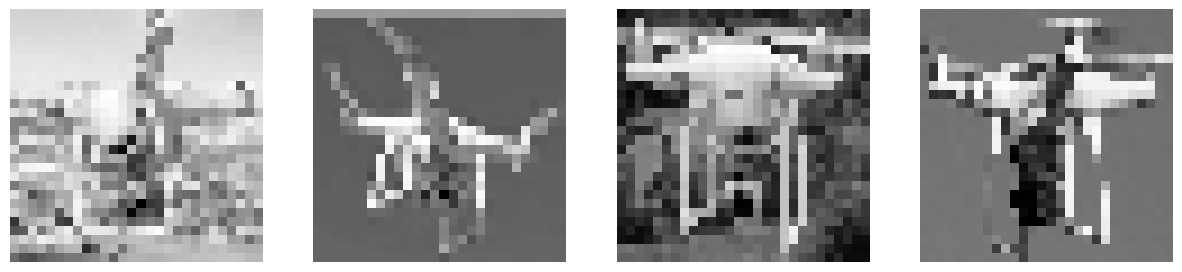

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image

# Define input and output directories
input_dir = "/content/drones/"
output_dir1 = "/content/drones_outA/"
output_dir2 = "/content/drones_outA2/"

# Create output directories if they don't exist
os.makedirs(output_dir1, exist_ok=True)
os.makedirs(output_dir2, exist_ok=True)

# Function to process each pair of files
def process_files(image_path, label_path):
    # Read image
    img = cv2.imread(image_path)

    # Read label file
    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()

    # Process each line in the label file
    for line in lines:
        values = line.split()
        class_label = int(values[0])
        x_center = int(float(values[1]) * img.shape[1])
        y_center = int(float(values[2]) * img.shape[0])
        box_width = int(float(values[3]) * img.shape[1])
        box_height = int(float(values[4]) * img.shape[0])

        # Draw rectangle on the image
        cv2.rectangle(img, (x_center - box_width//2, y_center - box_height//2),
                      (x_center + box_width//2, y_center + box_height//2),
                      (0, 255, 255), 2)

        # Crop the image
        cropped_img = img[y_center - box_height//2:y_center + box_height//2,
                          x_center - box_width//2:x_center + box_width//2]

        # Save the cropped image in grayscale
        gray_cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
        output_path = os.path.join(output_dir1, os.path.basename(image_path)[:-4] + "_grey_crop.jpg")
        cv2.imwrite(output_path, gray_cropped_img)

        # Resize the grayscale image to 28x28 pixels
        resized_img = cv2.resize(gray_cropped_img, (28, 28))
        output_path = os.path.join(output_dir2, os.path.basename(image_path)[:-4] + "_grey_crop.jpg")
        cv2.imwrite(output_path, resized_img)

        # Add tuple to the list
        data_list.append((resized_img, "drone"))

# List to store image matrices and labels
data_list = []

# Process each pair of files
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_dir, filename)
        label_path = os.path.join(input_dir, filename[:-4] + ".txt")

        # Process the pair of files
        process_files(image_path, label_path)

# Show the original images with rectangles
fig, axs = plt.subplots(1, len(data_list), figsize=(15, 5))
for i, (img, _) in enumerate(data_list):
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')

# Save the list to disk
output_path = "/content/drones_outA2/data_list.pkl"
np.save(output_path, data_list)

# Show the plot
plt.show()


Step 2 - for "drone" variant 1

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img

# Set the input and output directories
input_directory = '/content/drones/'
output_directory = '/content/drones_outA/'
output_directory_resized = '/content/drones_outA2/'

# Create output directories if they don't exist
os.makedirs(output_directory, exist_ok=True)
os.makedirs(output_directory_resized, exist_ok=True)

# Function to read YOLO annotation file and extract bounding box coordinates
def read_annotation_file(annotation_path):
    with open(annotation_path, 'r') as file:
        lines = file.readlines()
    bounding_boxes = []
    for line in lines:
        data = line.strip().split()
        class_label = int(data[0])
        x_center = float(data[1])
        y_center = float(data[2])
        box_width = float(data[3])
        box_height = float(data[4])
        bounding_boxes.append((class_label, x_center, y_center, box_width, box_height))
    return bounding_boxes

# Function to draw rectangles on an image based on bounding box coordinates
def draw_rectangles(image, bounding_boxes):
    image_with_rectangles = image.copy()
    for box in bounding_boxes:
        h, w, _ = image.shape
        x, y, box_w, box_h = (
            int((box[1] - box[3] / 2) * w),
            int((box[2] - box[4] / 2) * h),
            int(box[3] * w),
            int(box[4] * h),
        )
        cv2.rectangle(image_with_rectangles, (x, y), (x + box_w, y + box_h), (0, 255, 255), 2)
    return image_with_rectangles

# Function to crop the image based on bounding box coordinates
def crop_image(image, bounding_box):
    h, w, _ = image.shape
    x, y, box_w, box_h = (
        int((bounding_box[1] - bounding_box[3] / 2) * w),
        int((bounding_box[2] - bounding_box[4] / 2) * h),
        int(bounding_box[3] * w),
        int(bounding_box[4] * h),
    )
    cropped_image = image[y:y + box_h, x:x + box_w]
    return cropped_image

# Function to save a grayscale image
def save_grayscale_image(image, output_path):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(output_path, gray_image)

# Function to resize an image and save it
def resize_and_save_image(image, output_path, target_size=(28, 28)):
    resized_image = cv2.resize(image, target_size)
    cv2.imwrite(output_path, resized_image)

# List to store tuples (image_matrix, label)
image_label_list = []

# Process each pair of image and annotation file
for file_name in os.listdir(input_directory):
    if file_name.endswith('.jpg'):
        image_path = os.path.join(input_directory, file_name)
        annotation_path = os.path.join(input_directory, file_name.replace('.jpg', '.txt'))

        # Read image and annotation
        original_image = cv2.imread(image_path)
        bounding_boxes = read_annotation_file(annotation_path)

        # Draw rectangles on the image
        image_with_rectangles = draw_rectangles(original_image.copy(), bounding_boxes)

        # Show the image with rectangles using matplotlib
        plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB))
        plt.title('Image with Rectangles')
        plt.axis('off')
        plt.show()

        # Save image with rectangles
        output_image_path = os.path.join(output_directory, file_name)
        cv2.imwrite(output_image_path, image_with_rectangles)

        for box in bounding_boxes:
            # Crop the image based on the bounding box
            cropped_image = crop_image(original_image, box)

            # Save grayscale cropped image
            output_gray_path = os.path.join(output_directory_resized, file_name.replace('.jpg', '_grey_crop.jpg'))
            save_grayscale_image(cropped_image, output_gray_path)

            # Resize and save the grayscale image
            output_resized_path = os.path.join(output_directory_resized, file_name.replace('.jpg', '_resized.jpg'))
            resize_and_save_image(cropped_image, output_resized_path)

            # Append to the list of tuples
            image_label_list.append((img_to_array(cropped_image), 'drone'))

# Save the list to disk
list_output_path = '/content/drones_outA2/image_label_list.pkl'
np.save(list_output_path, image_label_list)
print(f'The image label list has been saved to {list_output_path}')


In [ ]:
# checking the outputs
vv = 'contents/drones_outA2/image_label_list.pkl.npy'
print (vv)

contents/drones_outA2/image_label_list.pkl.npy


Step 2 - for: 'not a drone'


In [ ]:
# Step 2 (data preprocessing) - make crops of the 'not a drone' and save them in 28 x 28 squares (matrices)
# try to make ChatGPT write some code on my behalf

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Read the files in /content/drones/
# These are in pairs.
# So for each file name, you will find a .jpg image file, and a .txt file.
# The .txt file is a yoloV8 annotation or label for the corresponding image file.
# Each line of the label file is a label:
# The first number in the line is the class.
# Then 4 coordinates follow:
#   coordinate#1: we don't care about this value.
#   coordinate#2: we don't care about this value.
#   coordinate#3: is the normalized box width, you need to multiply it by image width to get pixels.
#   coordinate#4: is the normalized box height, you need to multiply it by image height to get pixels.
# For each image do the following:
# Determine a random point within the whole image, we will call it random center.
# With this random center, as center, make a rectangle measuring box width by box height.
# Make a crop of this rectangle.
# Show this cropped rectangle.
# Use matplotlib to show the images.
# Transform this cropped image to gray-scale and save it to disk in the directory: /content/drones_outB (at the end of the file name, add "_grey_crop")
# Resize thees gray-scale images to 28 x 28 pixels using the Keras python library.
# Save the processed image in a list along with the appropriate label: 'not a drone'.
# Save this list to disk in the directory: /content/drones_outB2



Step 2 - for: 'not a drone"

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, array_to_img
from tqdm import tqdm

# Set paths
input_directory = '/content/drones/'
output_directory = '/content/drones_outB/'
output_directory2 = '/content/drones_outB2/'

# Create output directories if not exist
os.makedirs(output_directory, exist_ok=True)
os.makedirs(output_directory2, exist_ok=True)

# Function to read YOLO annotation file
def read_yolo_annotation(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        labels = [line.strip().split() for line in lines]
        return labels

# Function to process each pair of image and label
def process_image_and_label(image_path, label_path):
    # Read image
    image = cv2.imread(image_path)

    # Read YOLO annotation
    labels = read_yolo_annotation(label_path)

    for label in labels:
        class_id = int(label[0])
        box_width = float(label[3]) * image.shape[1]
        box_height = float(label[4]) * image.shape[0]

        # Generate random center
        center_x = np.random.uniform(box_width / 2, image.shape[1] - box_width / 2)
        center_y = np.random.uniform(box_height / 2, image.shape[0] - box_height / 2)

        # Calculate rectangle coordinates
        x1 = int(center_x - box_width / 2)
        y1 = int(center_y - box_height / 2)
        x2 = int(center_x + box_width / 2)
        y2 = int(center_y + box_height / 2)

        # Crop the rectangle
        cropped_image = image[y1:y2, x1:x2]

        # Display the cropped image
        plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        plt.show()

        # Convert the cropped image to gray-scale
        gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        # Save the gray-scale cropped image to disk
        output_file_path = os.path.join(output_directory, f"{os.path.basename(image_path)}_grey_crop.jpg")
        cv2.imwrite(output_file_path, gray_image)

        # Resize the gray-scale image to 28 x 28 pixels
        resized_image = cv2.resize(gray_image, (28, 28))

        # Save the processed image along with the label
        output_file_path2 = os.path.join(output_directory2, f"{os.path.basename(image_path)}_grey_crop.npy")
        np.save(output_file_path2, {'image': resized_image, 'label': 'not a drone'})

# Process each pair of image and label
for filename in os.listdir(input_directory):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_directory, filename)
        label_path = os.path.join(input_directory, filename.replace(".jpg", ".txt"))

        process_image_and_label(image_path, label_path)


In [ ]:
# this cell is for doing a drive mount of all "MyDrive" and its "shortcuts"
# so you first have to make a shortcut of the shared folder you want, into your MyDrive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 3 - TensorFlow Datasets:
   - Convert the lists of processed images and labels to TensorFlow datasets.
   - Ensure that the shapes and types of images and labels match TensorFlow's requirements.


Step 4 - Build Classifier Model:
   - Utilize the knowledge from previous homework (e.g., MNIST Fashion).
   - Split the dataset into training and testing sets.
   - Build a simple classifier model using TensorFlow/Keras.
   - Train the model on the training set and evaluate it on the test set.


Step 5 - Visualization and Analysis:
   - Plot some images from the dataset to visually inspect the processed images.
   - Display the accuracy of the trained model on the test set.
   - Think about potential improvements or additional steps in the preprocessing and model building phases.


Questions to think about:

Data Preprocessing:

- Why is it good to convert images to black and white?

*A color image will have exactly 3 times more features than the gray-scale image. Also gray-scale images are amost invariant to illumination changes, or changes in the color of the light, color images are very sensitive to illumination applied. "A blue drone, is also a drone, and a green camel is still a green camel"*

- How does resizing impact the training of machine learning models?

*A big sized image (let's say 512 x 512) will have 250 K features which is too much for a NN. Small images, like 28 x 28 pixels, will have 784 features, which is a big number, but not impossible.*

TensorFlow Datasets and Model Building:
- Why is it important to have consistent shapes and data types in TensorFlow datasets?

- How does the choice of activation function impact the model's performance?

- What can be done to improve the model's accuracy?

Tips:
- Break down the problem into smaller steps and tackle each one iteratively.
- Start by trying the preprocess on only one image, visualize the results and check the shape of the image, and then proceed and preprocess all the dataset.
- Experiment with the images resolution, different activation functions, and different model’s architectures!

This exercise combines practical coding skills with machine learning concepts, allowing you to apply your knowledge to real-world scenarios. Good luck and enjoy!
